### Libraries

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
import sklearn
from sklearn.preprocessing import MinMaxScaler

### Loading raw dataset temporal and spatial data nutrient pollution Thames River

In [74]:
df = pd.read_csv("test_steven_temporal.csv", usecols=["year", "Nitrate"])

In [75]:
df.head()

,year,Nitrate
0,2015,0.1
1,2015,12.0
2,2015,12.0
3,2015,7.5
4,2015,7.5


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2361 non-null   int64  
 1   Nitrate  2361 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 37.0 KB


In [77]:
training_set  = df.iloc[:, 1].values

In [99]:
x =training_set.reshape(-1, 1) 
min_max_scaler = MinMaxScaler()
training_set_scaled = min_max_scaler.fit_transform(x)

In [101]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

In [102]:
X, Y = to_supervised(training_set_scaled)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (2357, 1)
X (2357, 4, 1)


In [105]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1]))

In [106]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 64)             16896     
                                                                 
 lstm_4 (LSTM)               (None, 4, 32)             12416     
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 37665 (147.13 KB)
Trainable params: 37665 (147.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
history = model.fit(X, Y, epochs=500, batch_size=30, validation_split=0.1, verbose=1)

Epoch 1/500
71/71 [==============================] - 1s 5ms/step - loss: 0.1835 - val_loss: 0.1206
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1178 - val_loss: 0.1212
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1165 - val_loss: 0.1262
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1140 - val_loss: 0.1182
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1167 - val_loss: 0.1180
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1139 - val_loss: 0.1188
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1145 - val_loss: 0.1220
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1147 - val_loss: 0.1196
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1130 - val_loss: 0.1175
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1129 - val_loss: 0.1188
Epoch 11/

71/71 [==============================] - 0s 2ms/step - loss: 0.1080 - val_loss: 0.1206
Epoch 84/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1078 - val_loss: 0.1207
Epoch 85/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1069 - val_loss: 0.1202
Epoch 86/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1072 - val_loss: 0.1206
Epoch 87/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1068 - val_loss: 0.1220
Epoch 88/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1068 - val_loss: 0.1230
Epoch 89/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1072 - val_loss: 0.1193
Epoch 90/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1067 - val_loss: 0.1210
Epoch 91/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1076 - val_loss: 0.1218
Epoch 92/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1074 - val_loss: 0.1213
Epoch 93/500


71/71 [==============================] - 0s 2ms/step - loss: 0.1075 - val_loss: 0.1211
Epoch 165/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1065 - val_loss: 0.1231
Epoch 166/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1065 - val_loss: 0.1223
Epoch 167/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1065 - val_loss: 0.1212
Epoch 168/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1064 - val_loss: 0.1232
Epoch 169/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1067 - val_loss: 0.1211
Epoch 170/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1059 - val_loss: 0.1226
Epoch 171/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1064 - val_loss: 0.1212
Epoch 172/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1060 - val_loss: 0.1213
Epoch 173/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1064 - val_loss: 0.1209
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.1048 - val_loss: 0.1214
Epoch 246/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1048 - val_loss: 0.1218
Epoch 247/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1048 - val_loss: 0.1220
Epoch 248/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1051 - val_loss: 0.1246
Epoch 249/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1048 - val_loss: 0.1236
Epoch 250/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1057 - val_loss: 0.1213
Epoch 251/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1048 - val_loss: 0.1240
Epoch 252/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1054 - val_loss: 0.1227
Epoch 253/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1046 - val_loss: 0.1221
Epoch 254/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1043 - val_loss: 0.1216
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.1029 - val_loss: 0.1271
Epoch 327/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1032 - val_loss: 0.1234
Epoch 328/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1037 - val_loss: 0.1204
Epoch 329/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1039 - val_loss: 0.1226
Epoch 330/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1040 - val_loss: 0.1245
Epoch 331/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1037 - val_loss: 0.1233
Epoch 332/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1043 - val_loss: 0.1219
Epoch 333/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1032 - val_loss: 0.1251
Epoch 334/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1028 - val_loss: 0.1239
Epoch 335/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1035 - val_loss: 0.1221
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.1284
Epoch 408/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1020 - val_loss: 0.1287
Epoch 409/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1027 - val_loss: 0.1257
Epoch 410/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1018 - val_loss: 0.1243
Epoch 411/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1015 - val_loss: 0.1269
Epoch 412/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1021 - val_loss: 0.1229
Epoch 413/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1021 - val_loss: 0.1264
Epoch 414/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1017 - val_loss: 0.1256
Epoch 415/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1023 - val_loss: 0.1234
Epoch 416/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1011 - val_loss: 0.1281
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0995 - val_loss: 0.1250
Epoch 489/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1001 - val_loss: 0.1237
Epoch 490/500
71/71 [==============================] - 0s 2ms/step - loss: 0.1001 - val_loss: 0.1238
Epoch 491/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0992 - val_loss: 0.1255
Epoch 492/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0989 - val_loss: 0.1243
Epoch 493/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0996 - val_loss: 0.1229
Epoch 494/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0992 - val_loss: 0.1256
Epoch 495/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0992 - val_loss: 0.1254
Epoch 496/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0992 - val_loss: 0.1248
Epoch 497/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0989 - val_loss: 0.1217
Epoc

In [108]:

model.save('NN_NO3.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
result = model.predict(X)

74/74 [==============================] - 0s 755us/step


In [110]:
result

array([[0.44848153],
       [0.55554485],
       [0.5274464 ],
       ...,
       [0.604826  ],
       [0.42374477],
       [0.45960802]], dtype=float32)

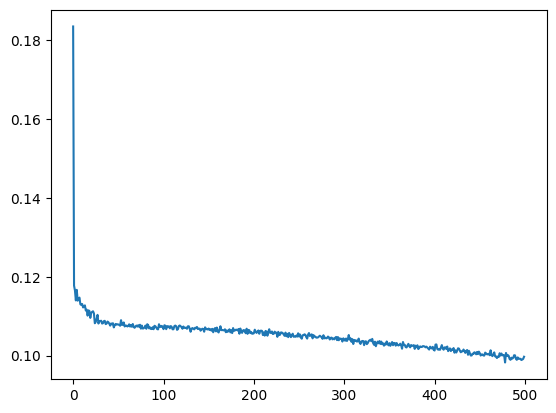

In [111]:
plt.plot(history.history['loss'])
plt.show()

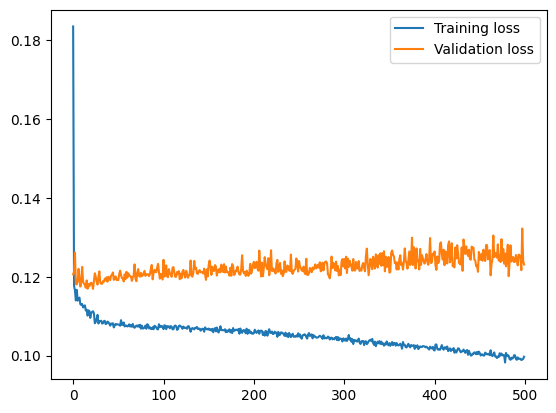

In [112]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [113]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (0, 4, 1)
X_test (2357, 4, 1)
Y_train (0, 1)
Y_test (2357, 1)


In [114]:

Y_pred = model.predict(X_test)

74/74 [==============================] - 0s 834us/step


In [115]:
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', training_set_scaled.shape)

y_predicted (2357, 1)
X_test (2357, 4, 1)
scaled Values shape (2361, 1)


In [137]:
d = training_set_scaled[:217,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d))
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test,d))
print('concat Y_test', Y_test.shape)

dummy (217, 1)
Y_pred (2357, 1)
concat y_pred (2357, 1)
concat Y_test (2357, 1)


In [141]:
Y_predicted = min_max_scaler.inverse_transform(Y_predicted)
Y_tested = min_max_scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (2574, 1)
Y_predicted (2574, 1)


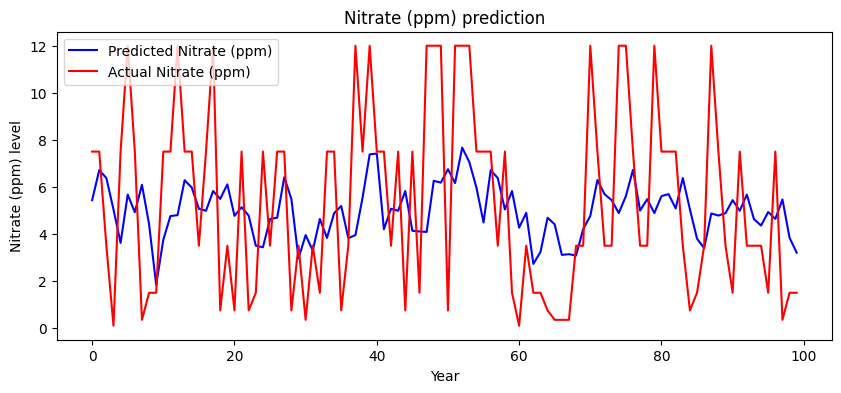

In [148]:
plt.figure(figsize=(10,4))  
plt.plot(Y_predicted[:100,:], color= 'blue',label = 'Predicted Nitrate (ppm)')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Nitrate (ppm)')
plt.title("Nitrate (ppm) prediction")
plt.xlabel("Year")
plt.ylabel("Nitrate (ppm) level")
plt.legend()
plt.savefig('graph.svg',dpi=300)
plt.show()
